<a href="https://colab.research.google.com/github/Armos05/Quantitative-Finance/blob/main/Mordern_Portfolio_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Modern Portfolio Theory

There’s no such thing as the perfect investment, but crafting a strategy that offers high returns and relatively low risk is priority for modern investors. While this hallmark seems rather straightforward today, this strategy actually didn’t exist until the latter half of the 20th century.

In 1952, an economist named Harry Markowitz wrote his dissertation on “Portfolio Selection”, a paper that contained theories which transformed the landscape of portfolio management—a paper which would earn him the Nobel Prize in Economics nearly four decades later.

As the philosophical antithesis of traditional stock selection, his Modern Portfolio Theory (MPT) continues to be a popular investment strategy, and this portfolio management tool—if used correctly—can result in a diverse, profitable investment portfolio.

Instead of focusing on the risk of each individual asset, Markowitz demonstrated that a diversified portfolio is less volatile than the total sum of its individual parts. While each asset itself might be quite volatile, the volatility of the entire portfolio can actually be quite low.

More than 60 years after its introduction, the fundamentals of MPT ring true. Let’s delve into this popular portfolio management strategy, and discover what makes the principles of this revolutionary theory so effective

This module will evaluate the proportion of the portfolio to maximize returns from 2015. Is it oil, gold, s&p 500, or

### Importing Data and libraries

In [ ]:
!pip install yfinance

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import warnings
import os
import yfinance as yf

# filter warnings
warnings.filterwarnings("ignore")

In [4]:
oil = yf.Ticker("CL=F")
oil = oil.history(period="max", auto_adjust=True)
oil = oil["Close"]
oil = oil.loc['2015-01-01':'2021-12-03']
gold = yf.Ticker("GC=F")
gold = gold.history(period="max", auto_adjust=True)
gold = gold["Close"]
gold = gold.loc['2015-01-01':'2021-12-03']
snp = yf.Ticker("^GSPC")
snp = snp.history(period="max", auto_adjust=True)
snp = snp["Close"]
snp = snp.loc['2015-01-01':'2021-12-03']
apple = yf.Ticker("AAPL")
apple = apple.history(period="max", auto_adjust=True)
apple = apple["Close"]
apple = apple.loc['2015-01-01':'2021-12-03']

df = pd.merge(oil,gold, on='Date', how='outer')
df = pd.merge(df,snp, on='Date', how='outer')
df = pd.merge(df,apple, on='Date', how='outer')
df.columns = ['OIL','GOLD','S&P500','Apple']


,OIL,GOLD,S&P500,Apple
Date,,,,
2015-01-02,52.689999,1186.000000,2058.199951,24.745993
2015-01-05,50.040001,1203.900024,2020.579956,24.048859
2015-01-06,47.930000,1219.300049,2002.609985,24.051126
2015-01-07,48.650002,1210.599976,2025.900024,24.388380
2015-01-08,48.790001,1208.400024,2062.139893,25.325432


In [ ]:
pip install qgrid

In [43]:
from google.colab import output
output.enable_custom_widget_manager()

In [45]:
import qgrid

widget = qgrid.show_grid(df)
widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

### Checking the distribution of Datasets

We will also assign skewness and kurtouis scores

Skewness: $\frac{1}{n}\sum^{n}_{t=1}\frac{(r_{t}-\bar{r})^3}{s^3}$, Kurtosis: $\frac{1}{n}\sum^{n}_{t=1}\frac{(r_{t}-\bar{r})^4}{s^4}$

For benchmark, the standard normal curve has skewness of 0 and kurtosis = 3.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from matplotlib.pyplot import plot

# use higher resolution for plots
%matplotlib inline
%config InlineBackend.figure_format = "retina"

# scipy for computing skewness and kurtosis
import scipy.stats as stats

In [6]:
def multiPlot(asset):
    # distribution plot using simple returns
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 6))
    sns.histplot(asset.pct_change().iloc[1:], ax = ax[0], bins = 30, color = "lightcyan", stat = "density")
    sns.kdeplot(asset.pct_change().iloc[1:], ax = ax[0], color = "blue", linestyle = "--", label = "Kernel Density")
    ax[0].set_xlim(-0.3, 0.3)
    ax[0].set_xlabel("Simple Returns")
    ax[0].set_title("Histogram of simple returns")
    
    # compute normal distribution for comparison with asset distributions
    mean, std = stats.norm.fit(asset.pct_change().iloc[1:])
    x = np.linspace(-0.3, 0.3, 300)
    p = stats.norm.pdf(x, mean, std)
    ax[0].plot(x, p, "r", linewidth = 2, label = "Normal")
    ax[0].legend()

    # probability plot
    stats.probplot(asset.pct_change().iloc[1:], dist = "norm", rvalue = True, fit = True, plot = plt)
    plt.xlabel("Normal Distribution")
    plt.ylabel("Sample Distribution")

#### Oil

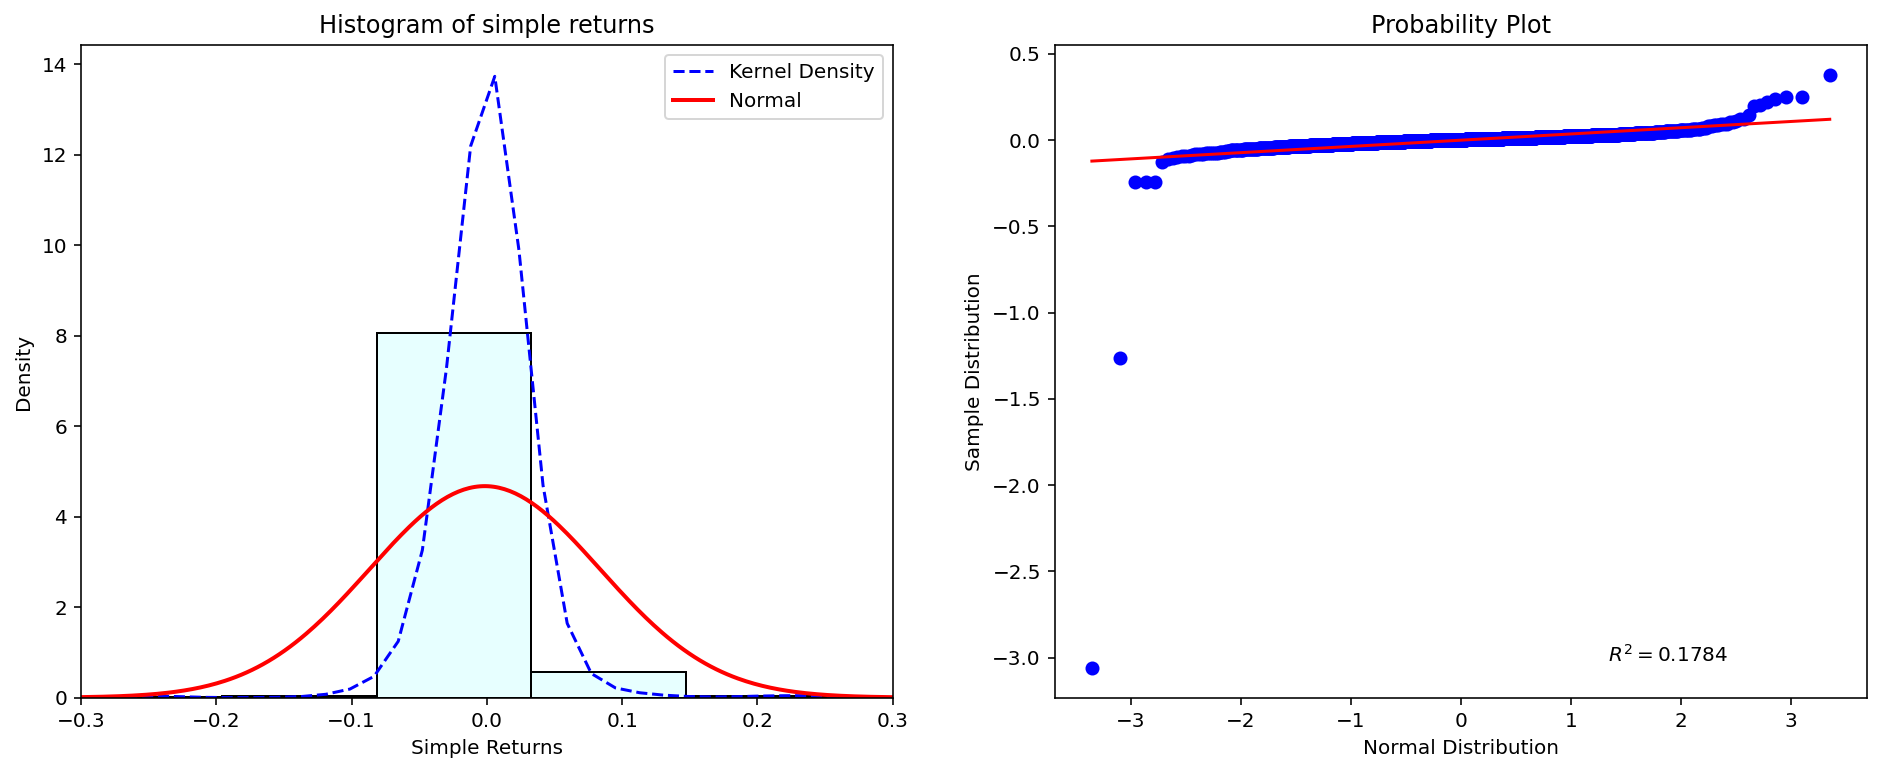

In [7]:
multiPlot(df["OIL"])

In [8]:
print("Oil distribution skewness: " + str(stats.skew(df["OIL"].pct_change().iloc[1:])))
print("Oil distribution kurtosis: " + str(stats.kurtosis(df["OIL"].pct_change().iloc[1:])))

Oil distribution skewness: -28.17721495434083
Oil distribution kurtosis: 971.134167424755


### Gold

Gold distribution skewness: -0.008857221217985043
Gold distribution kurtosis: 4.8905983287581085


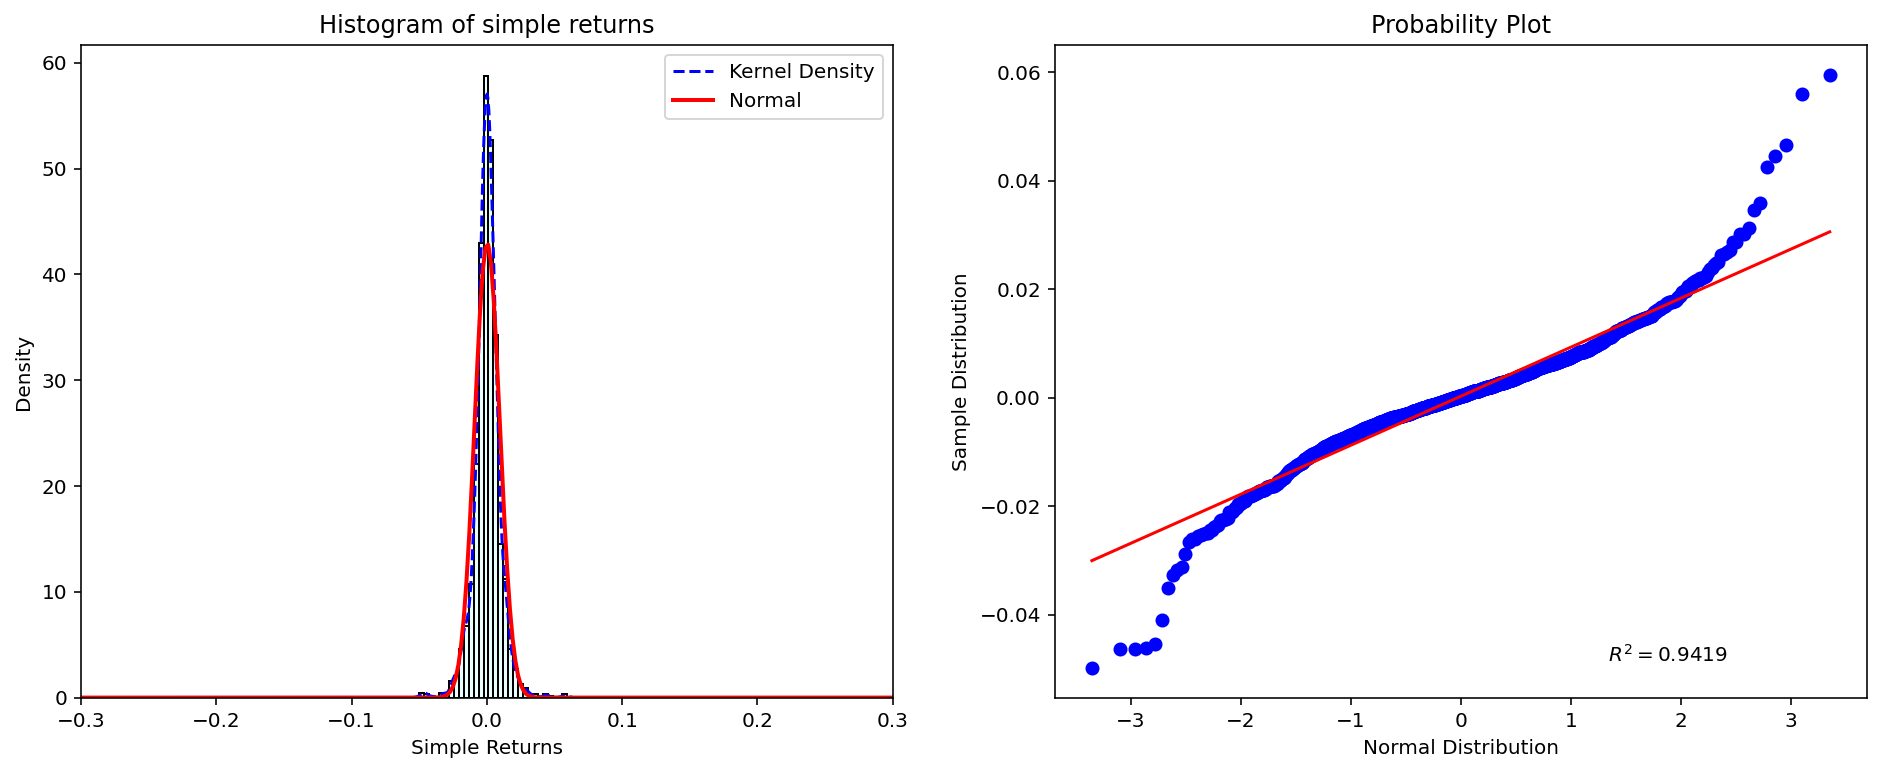

In [9]:
multiPlot(df["GOLD"])
print("Gold distribution skewness: " + str(stats.skew(df["GOLD"].pct_change().iloc[1:])))
print("Gold distribution kurtosis: " + str(stats.kurtosis(df["GOLD"].pct_change().iloc[1:])))

### S&P500

S&P500 distribution skewness: -17.23824186745264
S&P500 distribution kurtosis: 530.0947843807363


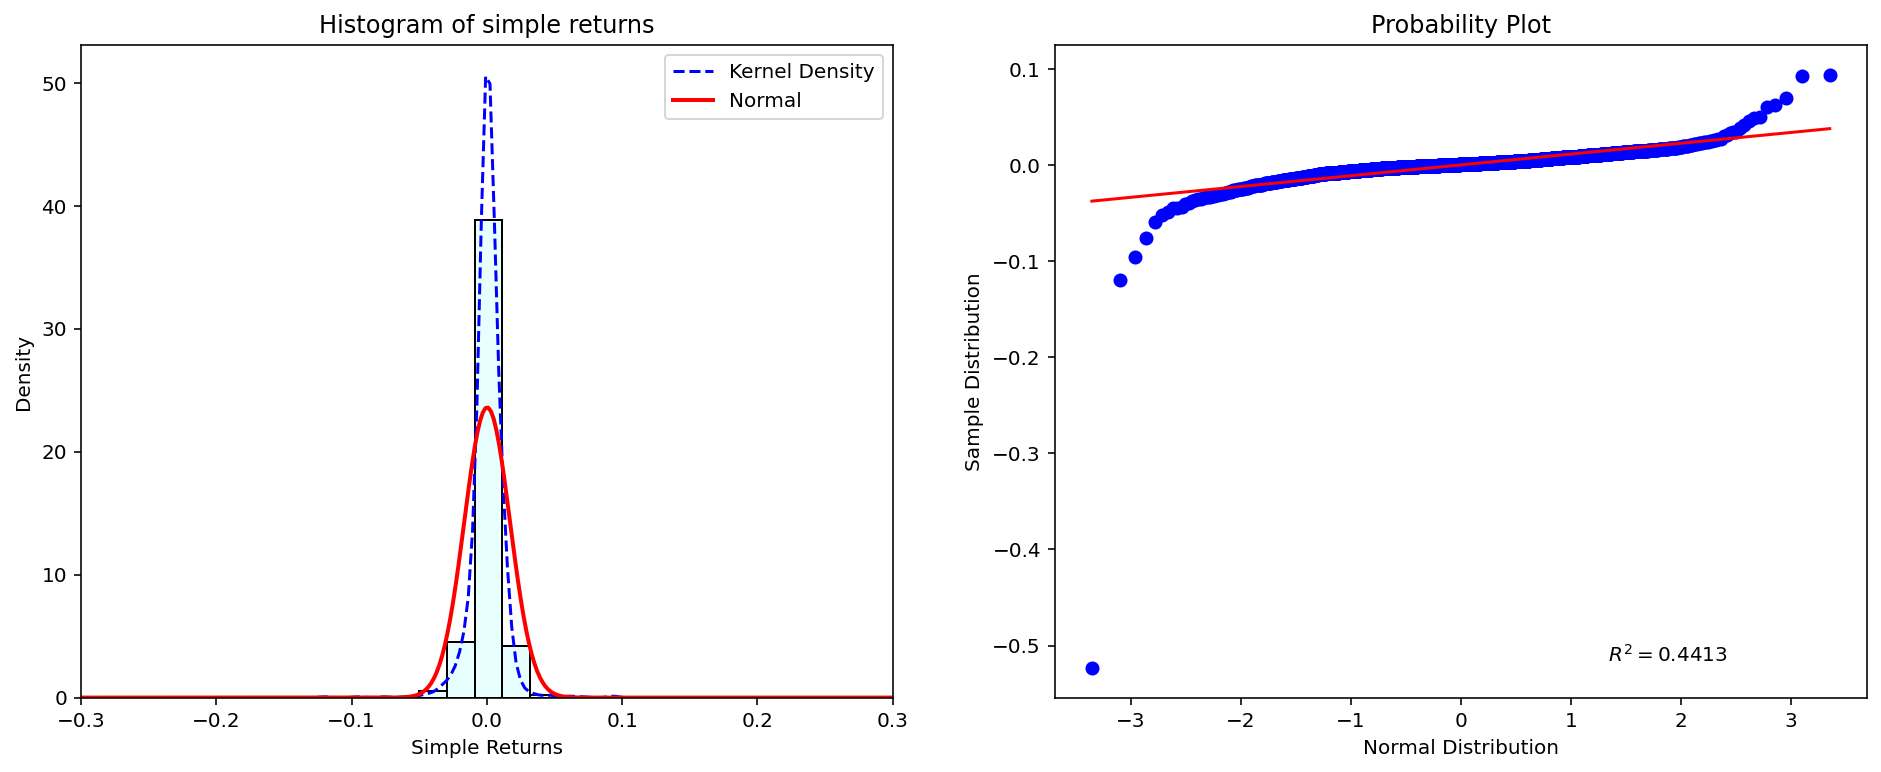

In [10]:
multiPlot(df["S&P500"])
print("S&P500 distribution skewness: " + str(stats.skew(df["S&P500"].pct_change().iloc[1:])))
print("S&P500 distribution kurtosis: " + str(stats.kurtosis(df["S&P500"].pct_change().iloc[1:])))

### Apple

Apple distribution skewness: -16.679389555973255
Apple distribution kurtosis: 511.7015795964496


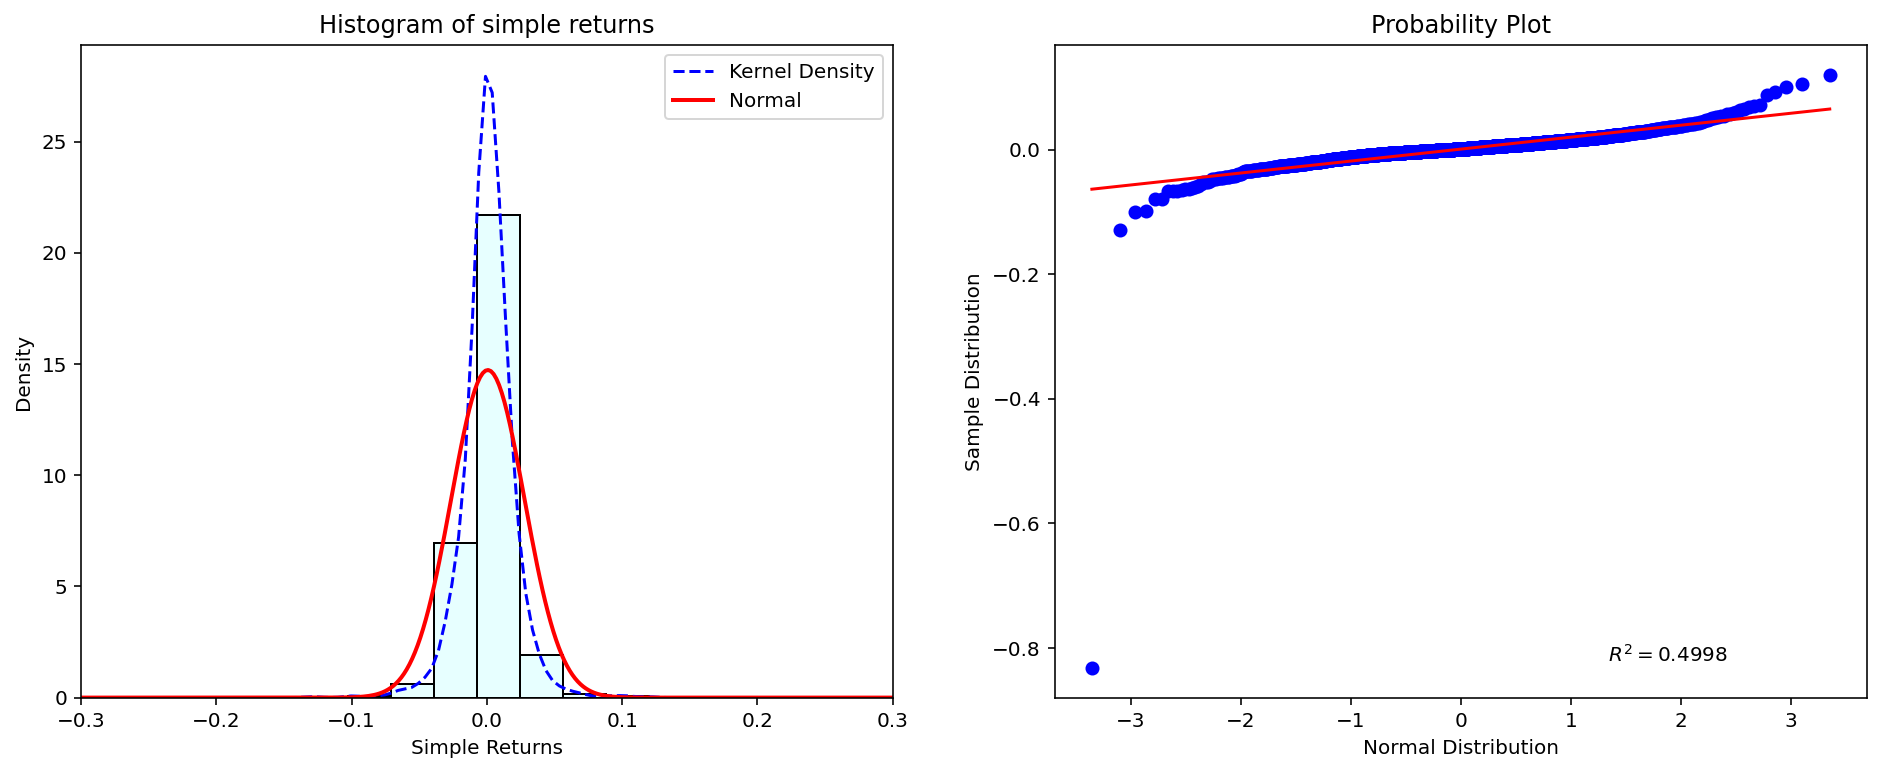

In [11]:
multiPlot(df["Apple"])
print("Apple distribution skewness: " + str(stats.skew(df["Apple"].pct_change().iloc[1:])))
print("Apple distribution kurtosis: " + str(stats.kurtosis(df["Apple"].pct_change().iloc[1:])))

## Calculating Annual Mean Return

Annual return for a asset can be calculated by:

$\bar{r_1} = \frac{Final_{Value} - Initial_{Value}}{Initial_{Value}}^{\frac{365}{n}}$

Here $n$ is the number of entries in your data set

and $\mu$ vector becomes
$$\mu = \begin{pmatrix} \bar{r}_{1} \\ \bar{r}_{2} \\ \bar{r}_{3} \\ \vdots \\ \bar{r}_{n} \\ \end{pmatrix}$$

In [ ]:
pip install PyPortfolioOpt

In [23]:
df = df.iloc[0:1742,:]

In [24]:
df.tail()

,OIL,GOLD,S&P500,Apple
Date,,,,
2021-11-26,68.150002,1785.300049,4594.620117,156.809998
2021-11-29,69.949997,1782.300049,4655.270020,160.240005
2021-11-30,66.180000,1773.599976,4567.000000,165.300003
2021-12-01,65.570000,1781.599976,4513.040039,164.770004
2021-12-02,66.500000,1760.699951,4577.100098,163.759995


In [25]:
from pypfopt import expected_returns
mu = expected_returns.mean_historical_return(df, compounding = True, frequency = 365)
print("Vector of mean returns:")
print(mu)

Vector of mean returns:
OIL       0.050012
GOLD      0.086366
S&P500    0.182415
Apple     0.486141
dtype: float64


## Calculating Covariance matrix $\sum$

In addition to the expected returns, MVO requires a risk model, some way of quantifying asset risk. We'll use the classic covariance-matrix first.

Whereas the sample covariance between two assets $x$ and $y$ can be denoted as: $\;\text{Cov}(x,y) = \sigma_{xy} = \frac{1}{N-1}\sum^N_{i=1}(x_{i}-\bar{x})(y_{i}-\bar{y})$,
 and the basic sample variance of an asset can be expressed as 
 $\sigma^2 = \frac{1}{N-1}\sum^N_{i=1}(x_{i}-\bar{x})^2$


 $$\Sigma = \begin{pmatrix} \sigma^2_{1} & \sigma_{12} & \cdots & \sigma^2_{1n} \\ \sigma_{21} & \sigma^2_{2} & \cdots & \sigma_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ \sigma_{n1} & \sigma_{n2} & \cdots & \sigma^2_{n} \end{pmatrix}$$



In [30]:
from pypfopt.risk_models import sample_cov
import seaborn as sns

sigma = sample_cov(df)
print(sigma)

             OIL      GOLD    S&P500     Apple
OIL     1.839138  0.003634  0.040198  0.042958
GOLD    0.003634  0.021770  0.000207  0.000949
S&P500  0.040198  0.000207  0.032369  0.038203
Apple   0.042958  0.000949  0.038203  0.084169


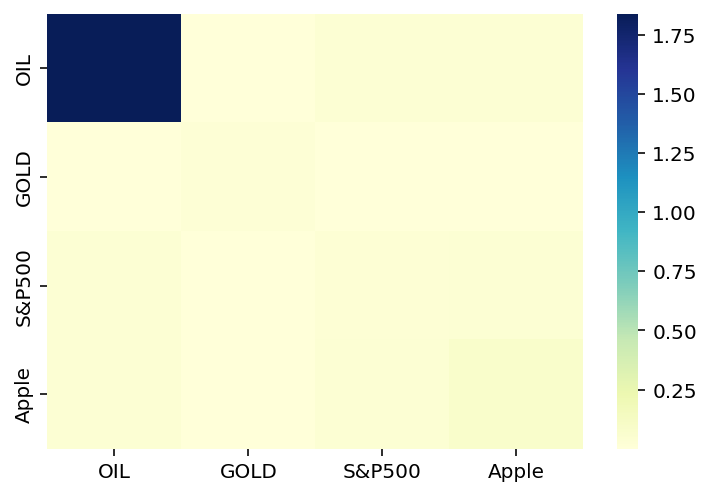

In [33]:
sns.color_palette("Set2")
sns.heatmap(sigma, cmap="YlGnBu")

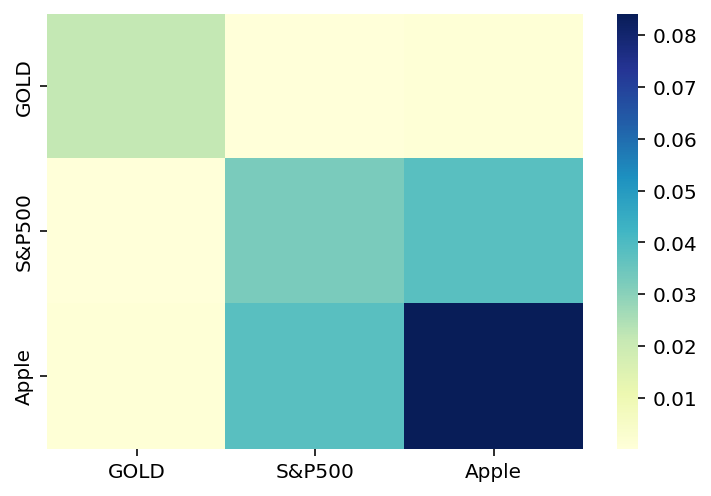

In [36]:
sns.heatmap(sigma.iloc[1:4,1:4], cmap="YlGnBu")

## Efficient Frontier

The efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk. Portfolios that cluster to the right of the efficient frontier are sub-optimal because they have a higher level of risk for the defined rate of return. We can plot the efficient frontier by defining $\mu_{p}=\mu^{T}w$ as the expected return and $\sigma^2_{p}=w^{T}\Sigma w$ as the volatility of the respected portfolio, the weights $w$ are initialized randomly at first.

After visualizing the efficient frontier, we want to find two specific portfolios: the portfolio with the maximum sharpe-ratio and the portfolio with the minimum volatility.

$$\text{Maximum Sharpe-Ratio: } \; \max_{w} \left\{ \frac{\mu^{T}w - r_{f}}{w^{T}\Sigma w} \right\}$$

Here, $r_f$ is the risk free rate of return.

$$\text{Minimum Volatility: } \; \min_{w} \{w^{T}\Sigma w\}$$

In [37]:
# generate n random portfolios for plotting
n = 20000
w = np.random.dirichlet(np.ones(len(mu)), n) # weights

# compute returns and volatility
returns = w.dot(mu)
variance = np.sqrt(np.diag(w @ sigma @ w.T))

# compute sharpe-ratio
sharpe_ratio = (returns - 0.02) / variance

In [38]:
from matplotlib.gridspec import GridSpec
from pypfopt.efficient_frontier import EfficientFrontier

# tell piecharts to only show weights > 0
def my_autopct(pct):
    return ("%.0f" % pct) if pct > 0 else "" 

# function for plotting the efficient frontier

# set colors for piechart
pie_c = ["orange", "grey", "cyan", "lightblue", "salmon"]

def plotEF(returns, variance, mu, sigma, labels_list):
    max_sharpe = EfficientFrontier(mu, sigma, weight_bounds = (0,1))
    max_sharpe.max_sharpe() # maximum sharpe-ratio
    returns_ms, variance_ms, _ = max_sharpe.portfolio_performance()

    min_vola = EfficientFrontier(mu, sigma, weight_bounds = (0,1))
    min_vola.min_volatility() # minimum volatility
    returns_mv, variance_mv, _ = min_vola.portfolio_performance()

    fig = plt.figure(figsize = (18, 8))
    gs = GridSpec(nrows = 2, ncols = 2, wspace = -0.2)
    
    ax0 = fig.add_subplot(gs[:,0])
    ax0.scatter(variance, returns, marker = ".", c = sharpe_ratio, cmap = "plasma")
    ax0.scatter(variance_ms, returns_ms, marker = ".", s = 700, c = "b", label = "Maximum Sharpe-Ratio")
    ax0.scatter(variance_mv, returns_mv, marker = ".", s = 700, c = "g", label = "Minimum Volatility")
    ax0.set_title("Efficient Frontier")
    ax0.set_xlabel("Volatility")
    ax0.set_ylabel("Returns")
    ax0.legend(frameon = False, borderpad = 1.5, labelspacing = 1)
    
    # plot piechart of portfolio with minimum volatility
    ax1 = fig.add_subplot(gs[0,1])
    ef_mv = EfficientFrontier(mu, sigma)
    weights_mv = ef_mv.min_volatility()
    pd.Series(weights_mv).plot.pie(labels = labels_list, colors = pie_c, autopct = my_autopct)
    plt.ylabel("")
    plt.title("Minimum Volatility Portfolio")

    # plot piechart of portfolio with maximum sharpe-ratio
    ax2 = fig.add_subplot(gs[1,1])
    ef_ms = EfficientFrontier(mu, sigma)
    weights_ms = ef_ms.max_sharpe()
    pd.Series(weights_ms).plot.pie(labels = labels_list, colors = pie_c, autopct = my_autopct)
    plt.ylabel("")
    plt.title("Maximum Sharpe-Ratio Portfolio")

    plt.show()

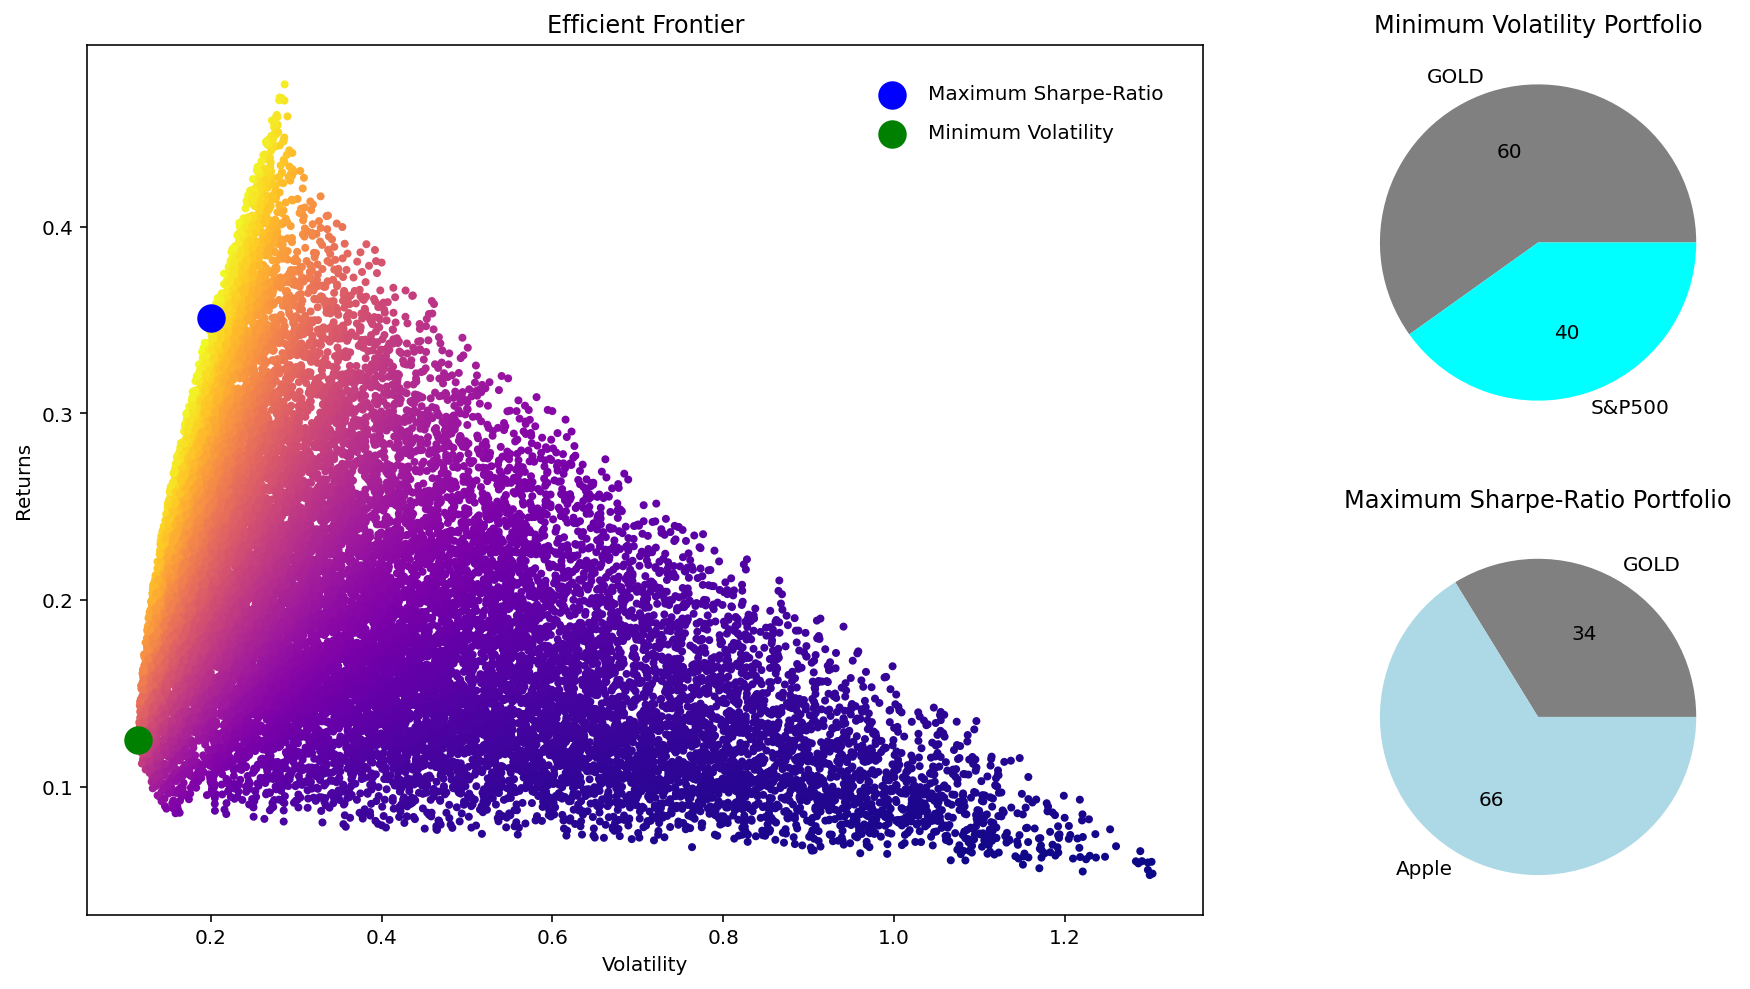

In [39]:
plotEF(returns, variance, mu, sigma, ["OIL", "GOLD", "S&P500", "Apple"])